# 22 — Statistical Plots (Q-Q, Regression, Distributions)

## Overview
This notebook focuses on plots frequently used in statistics and ML: distribution checks, regression visualization, residual analysis, and Q–Q plots.

### What you'll learn
- Q–Q plots to check normality
- Histogram + KDE + fitted normal overlay
- Linear regression line + confidence band
- Residual plots and heteroscedasticity hints
- Correlation vs causation reminders


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline
np.random.seed(42)
print('✅ Setup complete')

✅ Setup complete


## 1. Distribution Diagnostics: Histogram + KDE + Normal Fit
Use density histograms when comparing distributions or overlaying PDFs.


=== HIST + KDE + NORMAL FIT ===


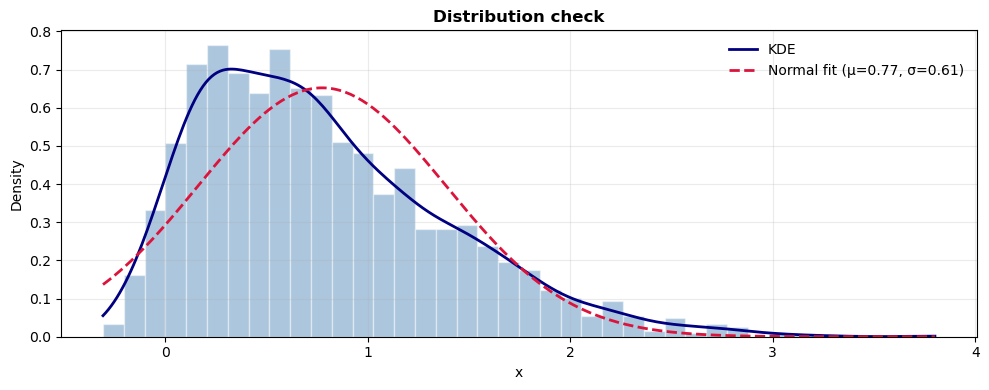

In [2]:
print('=== HIST + KDE + NORMAL FIT ===')
x = stats.skewnorm.rvs(a=6, loc=0, scale=1, size=2000, random_state=42)
mu, sigma = np.mean(x), np.std(x, ddof=1)

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(x, bins=40, density=True, alpha=0.45, color='steelblue', edgecolor='white')

kde = stats.gaussian_kde(x)
xs = np.linspace(x.min(), x.max(), 300)
ax.plot(xs, kde(xs), color='navy', lw=2, label='KDE')
ax.plot(xs, stats.norm.pdf(xs, mu, sigma), color='crimson', lw=2, linestyle='--',
        label=f'Normal fit (μ={mu:.2f}, σ={sigma:.2f})')

ax.set_title('Distribution check', fontweight='bold')
ax.set_xlabel('x'); ax.set_ylabel('Density')
ax.grid(True, alpha=0.25)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

## 2. Q–Q Plot (Normality Check)
A Q–Q plot compares sample quantiles to theoretical quantiles. If points lie on a straight line, the distributions match (approximately).


=== Q-Q PLOT ===


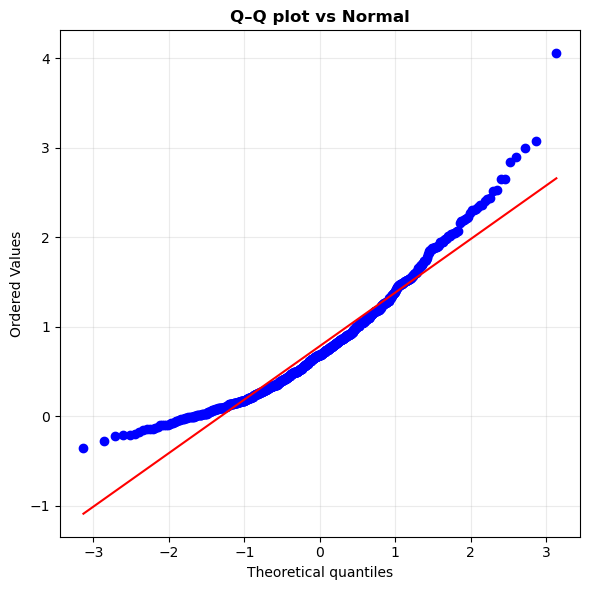

In [3]:
print('=== Q-Q PLOT ===')
x = stats.skewnorm.rvs(a=6, loc=0, scale=1, size=800, random_state=1)
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(x, dist='norm', plot=ax)
ax.set_title('Q–Q plot vs Normal', fontweight='bold')
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

## 3. Regression Plot + Confidence Band
We'll fit a simple linear regression using `scipy.stats.linregress` and show a confidence-style band using bootstrap (non-parametric).


=== REGRESSION + BOOTSTRAP BAND ===


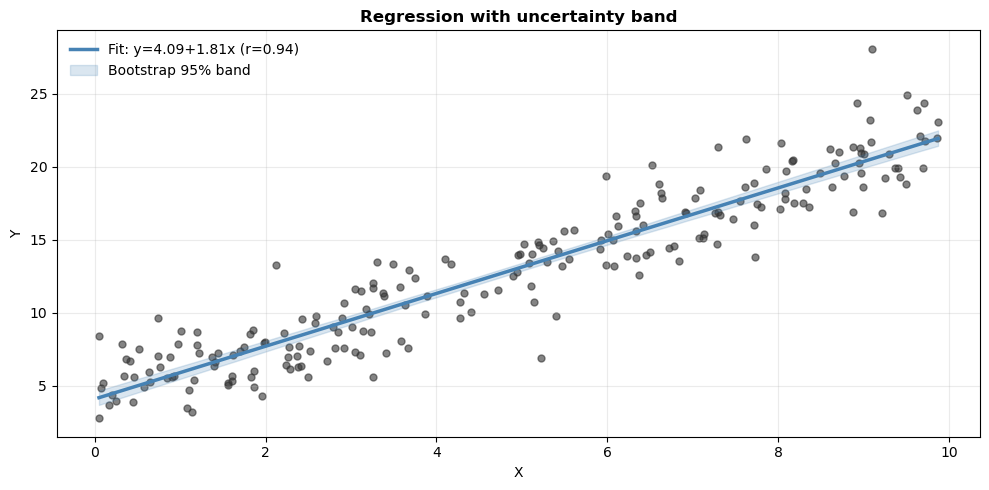

In [4]:
print('=== REGRESSION + BOOTSTRAP BAND ===')
n = 220
X = np.random.uniform(0, 10, n)
noise = np.random.normal(0, 2.0, n)
Y = 4.0 + 1.8*X + noise

# Fit line
slope, intercept, r, p, se = stats.linregress(X, Y)
xx = np.linspace(X.min(), X.max(), 200)
yhat = intercept + slope*xx

# Bootstrap band
B = 400
boot = np.empty((B, len(xx)))
for b in range(B):
    idx = np.random.randint(0, n, size=n)
    sb, ib, *_ = stats.linregress(X[idx], Y[idx])
    boot[b] = ib + sb*xx

lower = np.percentile(boot, 2.5, axis=0)
upper = np.percentile(boot, 97.5, axis=0)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X, Y, s=25, alpha=0.6, color='0.2')
ax.plot(xx, yhat, color='steelblue', lw=2.5, label=f'Fit: y={intercept:.2f}+{slope:.2f}x (r={r:.2f})')
ax.fill_between(xx, lower, upper, color='steelblue', alpha=0.2, label='Bootstrap 95% band')
ax.set_title('Regression with uncertainty band', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Y')
ax.grid(True, alpha=0.25)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

## 4. Residual Plot
Residual plots help spot non-linearity and changing variance (heteroscedasticity).


=== RESIDUAL PLOT ===


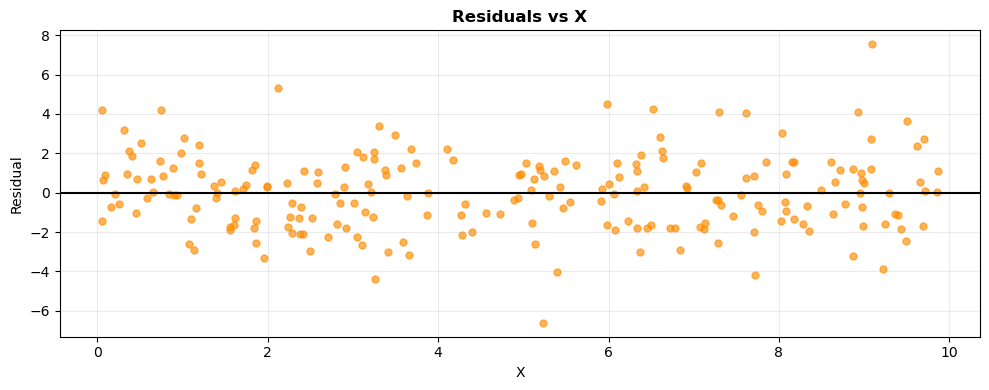

In [5]:
print('=== RESIDUAL PLOT ===')
y_pred = intercept + slope*X
resid = Y - y_pred

fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(X, resid, s=25, alpha=0.65, color='darkorange')
ax.axhline(0, color='black', lw=1.5)
ax.set_title('Residuals vs X', fontweight='bold')
ax.set_xlabel('X'); ax.set_ylabel('Residual')
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

## Practice + Quick Reference
### Practice
1. Generate truly normal data and compare Q–Q plot differences.
2. Fit polynomial regression and compare residuals.
3. Add a second dataset and compare distributions on the same density axis.

### Quick reference
```python
stats.probplot(x, dist='norm', plot=ax)
kde = stats.gaussian_kde(x)
slope, intercept, r, p, se = stats.linregress(X, Y)
```
